In [332]:
#We are using the Boston AirBNB open data set from data.world available at:
#    https://data.world/jerrys/boston-airbnb-open-data/workspace/file?filename=reviews.csv

In [333]:
#pandas provides DataFrame that is used to write data from and to files.
#it is also used to manipulate, filter and merge large datasets
import pandas as pd

#used for creating visualisations. it is used for basic plots and statistical plots 
import matplotlib.pyplot as plt

#nltk comes with powerful text processing such as cleaning, stemmng, tokenization, etc
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# the vader lexicon is typically used for text which has both negative and positive emotion - in particular, it is 
#used to quantify how much of a positive or negative emotion the text has and also the intensity of emotion

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fizzausman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# IMPORTING DATA AND CLEANING TEXT

In [334]:
df = pd.read_csv('/Users/fizzausman/Desktop/reviewsdoc.csv')

In [335]:
#since data is too big, we will be working with only first 300 rows
df.head(300).to_csv('/Users/fizzausman/Desktop/reviewsdoc2.csv')
df = pd.read_csv('/Users/fizzausman/Desktop/reviewsdoc2.csv')

In [336]:
# over here there is adding of row_id field to the dataframe, which will be useful for joining later
#row_id column is made by incrementing the in-built index field. 
#This row_id field serves as the unique key for this dataset to uniquely identify a row 
df["row_id"] = df.index + 1

In [337]:
#print the first 10 rows
print(df.head(10))

   Unnamed: 0  listing_id       id        date  reviewer_id reviewer_name  \
0           0     1178162  4724140  2013-05-21      4298113       Olivier   
1           1     1178162  4869189  2013-05-29      6452964     Charlotte   
2           2     1178162  5003196  2013-06-06      6449554     Sebastian   
3           3     1178162  5150351  2013-06-15      2215611        Marine   
4           4     1178162  5171140  2013-06-16      6848427        Andrew   
5           5     1178162  5198929  2013-06-17      6663826         Arndt   
6           6     1178162  6702817  2013-08-21      8099222       Maurice   
7           7     1178162  6873023  2013-08-28      7671888        Elodie   
8           8     1178162  7646702  2013-09-28      8197342     Arkadiusz   
9           9     1178162  8094418  2013-10-15      9040491       Matthew   

                                            comments  row_id  
0  My stay at islam's place was really cool! Good...       1  
1  Great location for both

In [338]:
#take row_id and comments and place them into a new dataframe 
#this is the input required by the SentimentIntensityAnalyzer class

df_subset = df[['row_id','comments']].copy()

In [339]:
df_subset

,row_id,comments
0,1,My stay at islam's place was really cool! Good...
1,2,Great location for both airport and city - gre...
2,3,We really enjoyed our stay at Islams house. Fr...
3,4,The room was nice and clean and so were the co...
4,5,Great location. Just 5 mins walk from the Airp...
...,...,...
295,296,The apartment was as advertised. It was clean ...
296,297,Nice place in a lovely neighborhood. Dror and ...
297,298,We liked the apartment but not the three fligh...
298,299,Appartamento molto bello nel cuore del North E...


In [340]:
#removing all the non-alphabets 
df_subset['comments'] = df_subset['comments'].str.replace("[^a-zA-Z#]", " ")

/var/folders/h3/mpj_h6hd1x1_sbmvhjc1v7jw0000gn/T/ipykernel_34986/4217497895.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['comments'] = df_subset['comments'].str.replace("[^a-zA-Z#]", " ")


In [341]:
df_subset

,row_id,comments
0,1,My stay at islam s place was really cool Good...
1,2,Great location for both airport and city gre...
2,3,We really enjoyed our stay at Islams house Fr...
3,4,The room was nice and clean and so were the co...
4,5,Great location Just mins walk from the Airp...
...,...,...
295,296,The apartment was as advertised It was clean ...
296,297,Nice place in a lovely neighborhood Dror and ...
297,298,We liked the apartment but not the three fligh...
298,299,Appartamento molto bello nel cuore del North E...


In [342]:
#convert to lower case
#The casefold() method returns a string where all the characters are lower case.
df_subset['comments']= df_subset['comments'].str.casefold()

In [343]:
df_subset['comments'] = df_subset['comments'].apply(lambda comments: str(comments))


In [344]:
print(df_subset.head(10))

   row_id                                           comments
0       1  my stay at islam s place was really cool  good...
1       2  great location for both airport and city   gre...
2       3  we really enjoyed our stay at islams house  fr...
3       4  the room was nice and clean and so were the co...
4       5  great location  just   mins walk from the airp...
5       6  a truely exeptional place to stay  the hosts a...
6       7  it was a really nice time in boston   best pla...
7       8  islam is a very nice guy   attentive  funny  h...
8       9  the place is really well furnished  pleasant a...
9      10  our stay at islam s place was fantastic  we co...


# Generate sentiment polarity scores



In [345]:
# polarity scores :-1 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

# polarity score between -1 to -0.5 --> negative sentiment
# polarity score between -0.5 and +0.5 --> neutral sentiment
# polarity score between +0.5 and 1 --> positive sentiment

# creating an empty df to stage the output of SentimentIntensityAnalyzer.polarity_scores method
#polarity_scores is a method which gives the following categories : positive, negative, neutral, compound
df1=pd.DataFrame()



In [346]:
df1['row_id']=['99999999999']

In [347]:
df1['sentiment_type']='NA999NA'



In [348]:
df1['sentiment_score']=0



In [349]:
print(df1.head(1))



        row_id sentiment_type  sentiment_score
0  99999999999        NA999NA                0


In [350]:
# 1st for loop : iterate polarity_scores method over each row of df_subset
# 2nd for loop : within the 1st for loop, used to assign sentiment polarity to each sentiment type to a substitute df

#at the end of the for loop, clean the output df by removing dummy data and removing duplications. 
# we only keep rows for compound sentiment type because it gives accurate total polarity of a text : it sums up the pos, neg and neutral scores 

print('Sentiment analysis is in Motion...')

sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df = pd.concat([t_df,df1])

#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(25))

Sentiment analysis is in Motion...
   row_id sentiment_type  sentiment_score
0       1       compound           0.9390
0       2       compound           0.9061
0       3       compound           0.9650
0       4       compound           0.9267
0       5       compound           0.8658
0       6       compound           0.8221
0       7       compound           0.9923
0       8       compound           0.9269
0       9       compound           0.9758
0      10       compound           0.9705
0      11       compound           0.9807
0      12       compound           0.9657
0      13       compound          -0.2960
0      14       compound           0.8834
0      15       compound           0.9169
0      16       compound           0.7876
0      17       compound           0.9410
0      18       compound           0.7845
0      19       compound           0.8649
0      20       compound           0.9825
0      21       compound           0.1531
0      22       compound           0.8519

# Merge t_df_cleaned with input dataframe df

In [351]:
#simple inner join on row_id
# resulting table should have listing_id, id, date, reviewer_id, reviewer_name, comments, row_id, sentiment_type, sentiment_score

df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(50))


    Unnamed: 0  listing_id        id        date  reviewer_id  reviewer_name  \
0            0     1178162   4724140  2013-05-21      4298113        Olivier   
1            1     1178162   4869189  2013-05-29      6452964      Charlotte   
2            2     1178162   5003196  2013-06-06      6449554      Sebastian   
3            3     1178162   5150351  2013-06-15      2215611         Marine   
4            4     1178162   5171140  2013-06-16      6848427         Andrew   
5            5     1178162   5198929  2013-06-17      6663826          Arndt   
6            6     1178162   6702817  2013-08-21      8099222        Maurice   
7            7     1178162   6873023  2013-08-28      7671888         Elodie   
8            8     1178162   7646702  2013-09-28      8197342      Arkadiusz   
9            9     1178162   8094418  2013-10-15      9040491        Matthew   
10          10     1178162   8174594  2013-10-19      9101576         Simona   
11          11     1178162   8226316  20

In [352]:
#summary stats of sentiment_score
# min value is -0.984300 which tells that polarity of the most negative comment is strongly negative
# max value is 0.995900 which tells that polarity of the most positive comment is highly positive
# we can see that the intensity of the most positive comment is slightly higher than the intensity of the most negative comment

# The mean value is +0.764561 which indicates the average polarity or intensity of sentiment across all comments is in the positive territory.
df_output[["sentiment_score"]].describe()

,sentiment_score
count,300.000000
mean,0.785833
std,0.318344
min,-0.943100
25%,0.796300
50%,0.909850
75%,0.964850
max,0.994700


<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='listing_id', ylabel='Mean Sentiment Score'>

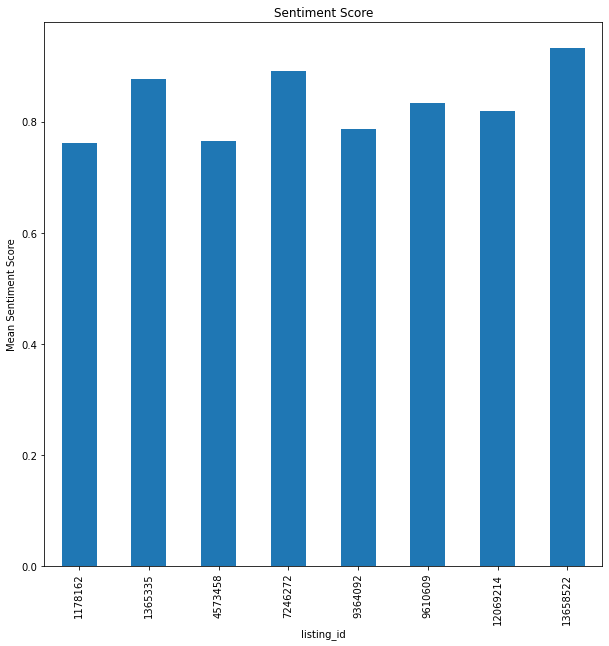

In [353]:
# use matplotlib to create charts to analyze sentiment scores by listing_id
# need to identify how mean sentiment score changes over the listings. 
# keep listing_id on x axis and mean sentiment score on y axis

#generate mean of sentiment_score by period
dfg = df_output.groupby(['listing_id'])['sentiment_score'].mean()

#create a bar plot - figsize is the width and height of figure in inches 

dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',xlabel='listing_id', figsize=(10, 10))

In [354]:
#This bar plot shows the mean sentiment score across reviewers for specific listings

#important observations:
#1. the score was almost the same for listings 1178162 and 4573458
#2. the highest score was for the listing 13658522
#3. the lowest score was for listing 1178162
#4. listings usually had scores above 0.5 indicating positive sentiment towards their services
#5. there was no drastic variability between listing sentiments


# The listing with the highest score could indicate that there are some hospitality standards or policies underway 
# there that customers really appreciate. It could be used to compare the services available at 
# different AIRBNBs and their effectiveness. 

#we need to make a boxplot - to study the spread and center of numerical data
# seaborn is used to create boxplot


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1178162'),
  Text(1, 0, '1365335'),
  Text(2, 0, '4573458'),
  Text(3, 0, '7246272'),
  Text(4, 0, '9364092'),
  Text(5, 0, '9610609'),
  Text(6, 0, '12069214'),
  Text(7, 0, '13658522')])

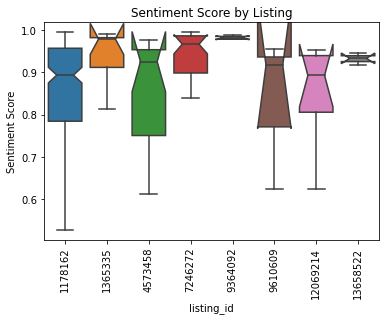

In [355]:
import seaborn as sns
#create seaborn boxplots by listings
sns.boxplot(x='listing_id', y='sentiment_score', notch = True,
            data=df_output, showfliers=False).set(title='Sentiment Score by Listing')
#modify axis labels
plt.xlabel('listing_id')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)

In [356]:
#The box for listing 1178162 is the tallest box, which indicates a wider spread in the sentiment scores of comments from the reviewers. This spread is a sign of polarization within the reviewer's opinions, which means some reviewers feel strongly positive about the AIRBNB while others feel strongly negative. 
#The manager of this listing might be able to use this deep-dive insight, along with their knowledge of the services provided at the AIRBNB, to identify and possibly address any concerns impacting their hotel’s standards.

#The box for listing 9364092 is shortest, indicating a narrow spread of sentiment scores, which means most reviewers feel the same way about the AIRBNB. The notch indicates a median value of sentiment scores for this listing is around 0.97, which is strongly positive.